# New York Crime Statistics

### Goal: Model the data along:

Propertycrime=α+Population+Population2+Murder+Robbery

with Murder and Robbery as categorical data, 1's and 0's.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import string

%matplotlib inline

In [2]:
crime_df = pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv')

In [3]:
crime_df.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


We want 'Murder' and 'Robbery' to be categorical -- either 0 or 1. I'll just make a new dataframe with exactly the data we want.

In [4]:
crime_clean = pd.DataFrame()
crime_clean['City'] = crime_df['City']

In [5]:
# Population and Robbery columns are in an unfortunate format. Need to remove punctuation and convert to numeric.

translator = str.maketrans('', '', string.punctuation)
crime_clean['Population'] = [num.translate(translator) for num in crime_df['Population']]
crime_clean['Population'] = pd.to_numeric(crime_clean['Population'])

In [6]:
crime_clean['PopSq'] = crime_clean['Population'] ** 2
crime_clean['Murder'] = [1 if x > 0 else 0 for x in crime_df['Murder and\nnonnegligent\nmanslaughter']]

In [7]:
crime_clean['Robbery'] = [num.translate(translator) for num in crime_df['Robbery']]
crime_clean['Robbery'] = pd.to_numeric(crime_clean['Robbery'])
crime_clean['Robbery'] = [1 if x > 0 else 0 for x in crime_clean['Robbery']]

In [8]:
crime_clean.head(10)

,City,Population,PopSq,Murder,Robbery
0,Adams Village,1861,3463321,0,0
1,Addison Town and Village,2577,6640929,0,0
2,Akron Village,2846,8099716,0,0
3,Albany,97956,9595377936,1,1
4,Albion Village,6388,40806544,0,1
5,Alfred Village,4089,16719921,0,1
6,Allegany Village,1781,3171961,0,0
7,Amherst Town,118296,13993943616,1,1
8,Amityville Village,9519,90611361,0,1
9,Amsterdam,18182,330585124,0,1


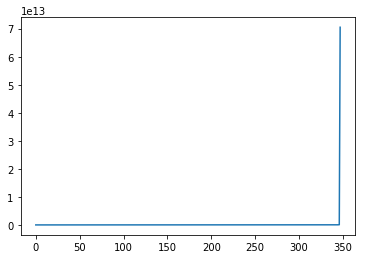

In [9]:
plt.plot(sorted(crime_clean['PopSq']))

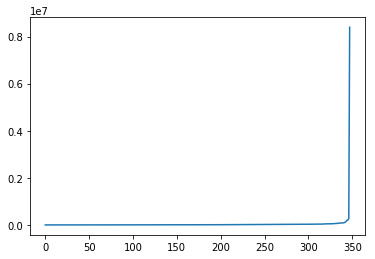

In [10]:
plt.plot(sorted(crime_clean['Population']))

So, this is kind of silly. Pop and PopSq basically just show New York City. Because we've changed Robbery and Murder to categorical variables, we're not too worried how much higher than than the mean those value are. Let's reduce the Pop of NYC to the next highest value.

In [11]:
crime_clean['Population'].sort_values(ascending=False).head(3)

216    8396126
35      258789
272     210562
Name: Population, dtype: int64

In [12]:
crime_clean.loc[216, 'Population'] = crime_clean.loc[35, 'Population']
crime_clean.loc[216, 'PopSq'] = crime_clean.loc[35, 'PopSq']

Great! The data is all cleaned up and ready to process. Let's normalize Pop and PopSq.

In [13]:
crime_clean['Population'] = (crime_clean['Population'] - crime_clean['Population'].mean()) / crime_clean['Population'].std()
crime_clean['PopSq'] = (crime_clean['PopSq'] - crime_clean['PopSq'].mean()) / crime_clean['PopSq'].std()

In [14]:
crime_clean.describe()

,Population,PopSq,Murder,Robbery
count,3.480000e+02,3.480000e+02,348.000000,348.000000
mean,5.678727e-17,4.705687e-18,0.140805,0.600575
std,1.000000e+00,1.000000e+00,0.348321,0.490486
min,-5.374155e-01,-1.903520e-01,0.000000,0.000000
25%,-4.548796e-01,-1.889361e-01,0.000000,0.000000
50%,-3.139155e-01,-1.819212e-01,0.000000,1.000000
75%,5.907862e-02,-1.353645e-01,0.000000,1.000000
max,8.068140e+00,1.065749e+01,1.000000,1.000000
